In [1]:
import torch
from torch import nn
from torch.nn import functional as F

from deep_lda import DeepLDA

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

# MNISTデータセットのダウンロードとDataLoaderの設定
train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='data', train=False, download=True, transform=transform)

# バッチサイズを設定
batch_size = 64

# DataLoaderの作成
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [3]:
lda = DeepLDA(28*28, 200, 10)

In [4]:
lda.train(train_loader)

epoch:1, loss:13705.400960720717
epoch:2, loss:11029.882213222052
epoch:3, loss:9905.298150680363
epoch:4, loss:9530.830971309699
epoch:5, loss:9228.39642184165
epoch:6, loss:8789.398809052327
epoch:7, loss:8463.539005177761
epoch:8, loss:8284.778999841583
epoch:9, loss:8140.666255857291
epoch:10, loss:8018.478068511539
epoch:11, loss:7921.927111125934
epoch:12, loss:7843.252036502801
epoch:13, loss:7783.112396924193
epoch:14, loss:7728.500168318937
epoch:15, loss:7683.414587259038
epoch:16, loss:7645.346852435882
epoch:17, loss:7610.129490676278
epoch:18, loss:7578.91523760589
epoch:19, loss:7556.244423588414
epoch:20, loss:7525.925741645544
epoch:21, loss:7500.354803290922
epoch:22, loss:7477.937550808348
epoch:23, loss:7457.176928736993
epoch:24, loss:7440.560539579443
epoch:25, loss:7420.21129941177
epoch:26, loss:7403.665546624867
epoch:27, loss:7385.859828887907
epoch:28, loss:7370.471894645894
epoch:29, loss:7353.102069541255
epoch:30, loss:7338.622134409185


In [5]:
from sklearn.manifold import TSNE
import numpy as np

In [6]:
test_loader = DataLoader(dataset=test_dataset, batch_size=60000, shuffle=False)

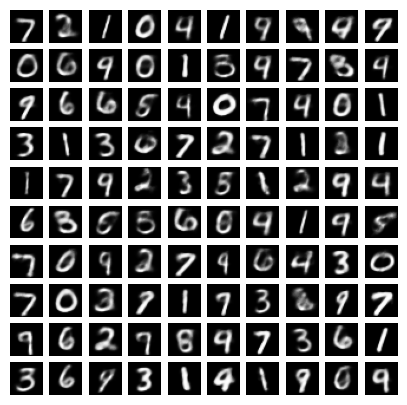

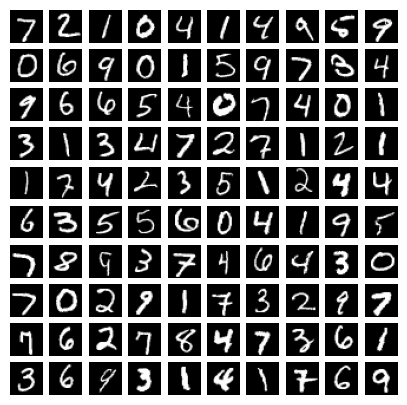

In [7]:
for t, (batch_data, label) in enumerate(test_loader):
    x = batch_data.view(batch_data.size(0), 28*28).to("cuda")
    mu, logvar, z, theta, xh = lda.x_to_z_to_xh(x)
    
    plt.figure(figsize=(5, 5))
    for i in range(100):
        plt.subplot(10, 10, i + 1)
        plt.imshow(xh[i].view(1, 28, 28).detach().cpu().numpy().squeeze(), cmap='gray')
        plt.axis('off')
    plt.savefig(f'./figs/xh_pred.png')
    plt.show()

    plt.figure(figsize=(5, 5))
    for i in range(100):
        plt.subplot(10, 10, i + 1)
        plt.imshow(x[i].view(1, 28, 28).detach().cpu().numpy().squeeze(), cmap='gray')
        plt.axis('off')
    plt.savefig(f'./figs/xh_true.png')
    plt.show()
    
    if t == 0:
        break

In [10]:
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(np.array(theta.detach().cpu().numpy()))

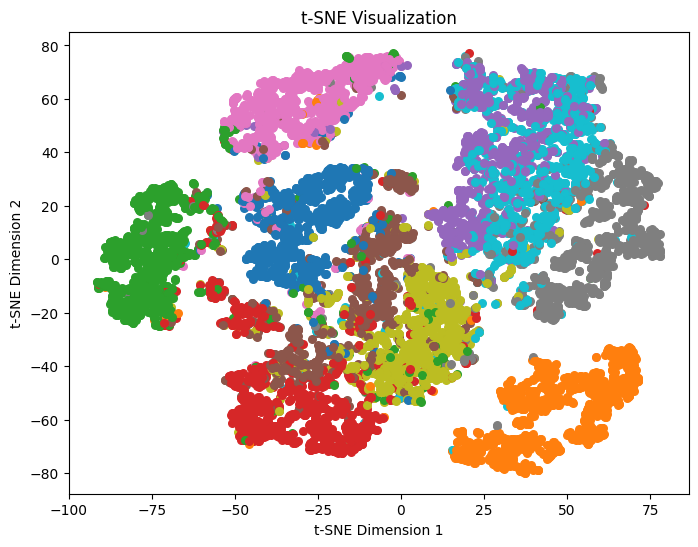

In [9]:
colors = [
    (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),   # 青
    (1.0, 0.4980392156862745, 0.054901960784313725),                 # オレンジ
    (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),  # 緑
    (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),   # 赤
    (0.5803921568627451, 0.403921568627451, 0.7411764705882353),     # 紫
    (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),  # 茶
    (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),    # ピンク
    (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),    # グレー
    (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),   # イエロー
    (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)    # シアン
]

# プロット
plt.figure(figsize=(8, 6))
for i, (x,y) in enumerate(X_embedded):
    ci = colors[int(label[i])]
    plt.scatter(x, y, color=ci, marker='o', s=30)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.savefig('./figs/tSEN_z.png')
plt.show()